# Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! Completed by Paul Foley.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Let's run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. If the dataset loaded successfully, the size of the dataset is reported.

In [18]:
# Import libraries
import numpy as np
import pandas as pd

# Allows the use of display() for DataFrames
from IPython.display import display 

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Import supplementary visualizations code visuals.py and seaborn
import visuals as vs
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. We will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Let's run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [19]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. Let's look at **three** indices and add them to the `indices` list which will represent the customers to track.

In [20]:
# Select three indices to sample from the dataset
indices = [1,2,3]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("\n Chosen samples of wholesale customers dataset:")
display(samples)


 Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,6353,8808,7684,2405,3516,7844
2,13265,1196,4221,6404,507,1788


Let's consider the total purchase cost of each product category and the statistical description of the dataset above for our sample customers. To understand our data better let's visualize the data in a Seaborn plot:

Quartiles For Each Product:
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


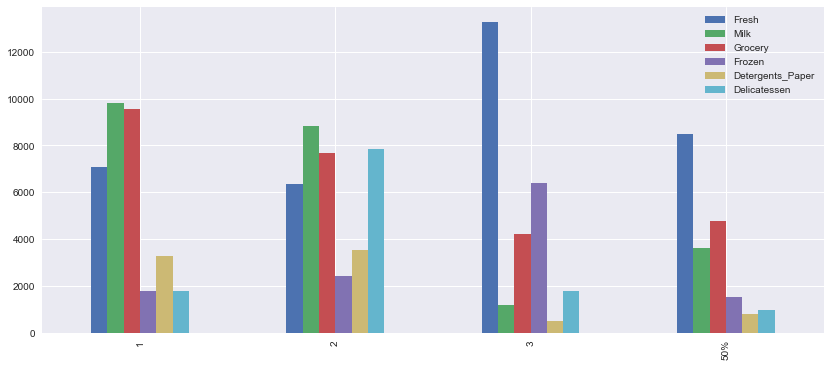

In [21]:
# Print the Mean, Count, and Quartile Ranges For the Data
data_description = data.describe()
print('Quartiles For Each Product:')
print(data_description)

# Use Seaborn for Data Visualisation of samples
samples_bar = samples.append(data_description.loc['50%'])
samples_bar.index = indices + ['50%']
_ = samples_bar.plot(kind='bar', figsize=(14,6))

### Observation
What kind of establishment (customer) could each of the three samples you've chosen represent?  
Examples of establishments include places like markets, cafes, and retailers, among many others.

Sample 1: 

* Has above median purchases for Milk, Grocery, Detergents_Paper, and Delicatessen, and below median purchases of Fresh.
* From this purchase behavior maybe we can guess this is a grocery store or restuarant?

Sample 2:

* Has above median purchases for Milk, Grocery, Frozen, Detergents Paper, and Delicatessen, and below median purchases of Fresh.
* This might be alose be a gorcery store or restaurant?

Sample 3:

* Has above median purchases for Fresh, Frozen, and Delicatessen, and below median purchse for Milk, Grocery, and  Detergents_Paper.
* This looks more like a restaurant?

It's somewhat hard to tell by just guessing off the top of our heads, let's explore the data more below.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, we will implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as our target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [22]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(labels = 'Milk', axis = 1, level = None, inplace = False, errors = 'raise')

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Milk'], test_size=0.25, random_state=42)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 42).fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.156275395017


### Observation
Above we tried to predict the Milk feature. The reported R^2 score is 0.1563, which is low, thus we would consider that Milk could not be predicted by other products.

The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

An R^2 analysis doesn't give us much confidence that the other features correlate to predicting the purchsing of milk. 

However, this doesn't mean it's not necessary for identifying a customers spending habits. For the task of clustering or classification, we gain more by adding a feature which cannot be predicted by other features.

Also, the case could be that certain products correlate to Milk purchasing while other products do not. I think what we need to do is some unsupervised learning, using clustering, to see which features "cluster" together and whether those identify a customers spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If we find that the feature we attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if we believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

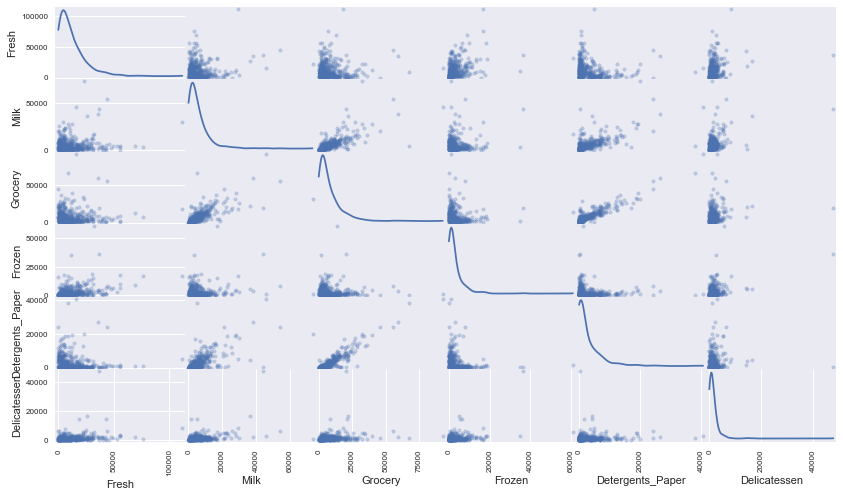

In [23]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

From the initial scatter plots, there does appear to be some linear correlation between certain features. Milk Seems to correlate to Detergents_Paper as well as Grocery in a linear relationship. As well as Grocery seems to correlate to Detergents_Paper in a linear relationship. 

Let's make a correlation heatmap to further explore:

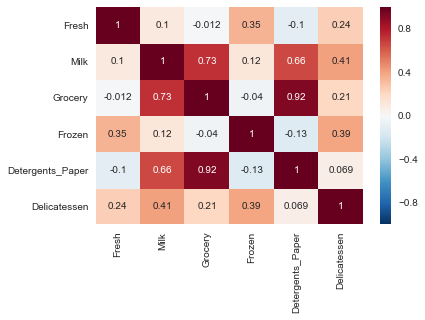

In [24]:
sns.heatmap(data.corr(),annot=True)

### Observation
This confirms our suspicions that there are certain features, like Detergents_Paper and Grocery that do correlate (.92) as well as Milk and Grocery (.73). As we saw earlier we got a somewhat low correlation score when comparing Milk to all features, and this makes sense because Milk doesn't appear to correlate at all with Frozen or Fresh. However Milk correlates to certain features. If multiple features correlate to one another, we can reduce our dimensions by doing a PCA analysis (more below) which will reduce our feature set without a large loss in accuracy.

As far as feature distribution in the scatter plot, all features seem to be positively skwed as there peaks on the left are close to x = 0 and then decrease as x increases. See graphs below:

<img src="images/skew_cuves.jpg">

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, we will implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

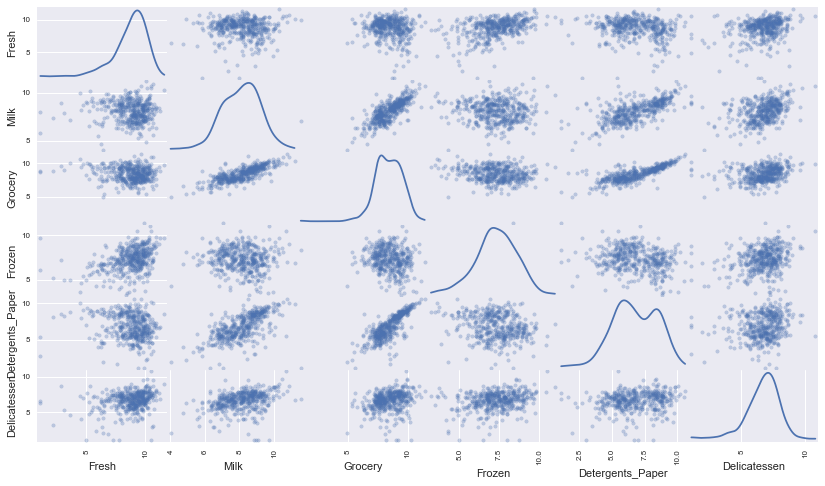

In [25]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features we may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [26]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
2,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, we will implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If we choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once we have performed this implementation, the dataset will be stored in the variable `good_data`.

In [27]:
# Select the indices for data points you wish to remove
outlier_counter  = {}

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    for i in feature_outliers.index.tolist():
        if i in outlier_counter:
            outlier_counter[i] += 1
        else:
            outlier_counter[i] = 0

outliers = []

for outlier in outlier_counter:
    if outlier_counter[outlier] >= 1:
        outliers.append(outlier)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Observation
As we can see there are several oultiers (printed below) and these should be removed from the data set. These are points that show up outside the interquartile range across multiple products.

In [28]:
print("Outliers: " + str(outliers))
print('Number of Outliers: ' + str(len(outliers)))

Outliers: [65, 66, 128, 154, 75]
Number of Outliers: 5


Outlier detection is a very important aspect of analysis, some times, some observations deviate from the norm and this may be due to a number of reasons, it is generally good practice to examine and understand the data properly before deciding whether to remove, impute or leave in the data. 

One reason to deal with outliers is that they may skew the analysis and bias it one way or another, The K-Means algorithm for example can be skewed considerably because like many machine learning models, their process occurs in euclidean space and this makes them susceptible. See the links below for some discussion on outliers.

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, we will implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.7068,-0.5184,-0.5686,-0.5088,-0.3223,-0.7938,-0.6440
Dimension 3,0.8299,-1.1958,-0.5284,-0.5283,-0.0073,-1.0055,-0.0154
Dimension 4,0.9311,-1.4001,-0.5156,-0.4726,0.7781,-0.7959,-0.5577
Dimension 5,0.9796,-1.4027,0.2036,-0.1172,0.7450,-1.3541,-0.7669
Dimension 6,1.0000,-1.3735,-0.3366,0.7033,0.7655,-1.5365,-0.7472


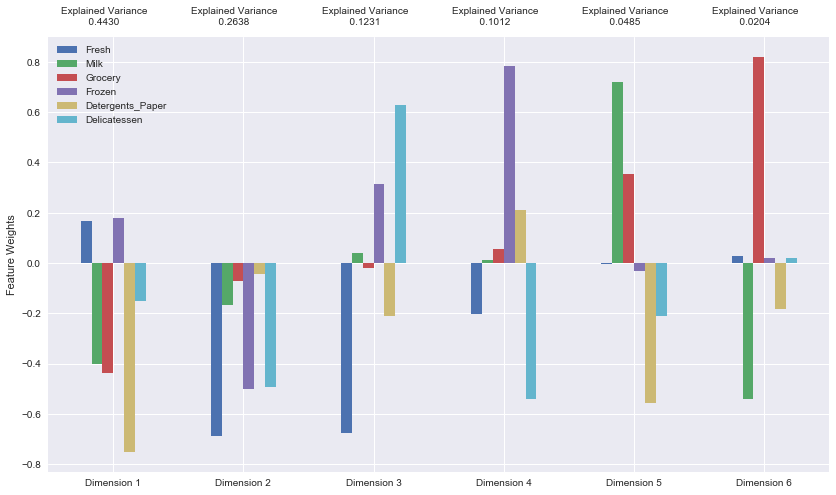

In [29]:
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6).fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

pca_results.cumsum()

### Observation
A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

Dimension 1 and 2 explain 0.7252 of the total variance. Dimensions 1, 2, 3, and 4 explain 0.9279.

Let's dive into each dimension and what they represent:

* Dimension 1 represents customers buying Milk, Grocery, and Detergents_Paper. This could reprsent a grocery store purchasing behavior.

* Dimension 2 represents customers buying Fresh, Frozen, and Delicaatessen. This could be a restaurant purchasing behavior.

* Dimension 3 represents customers buying Delicatessen who DON'T buy Fresh. This could be a particular Delicatessen purchasing behavior.

* Dimension 4 represents customers buying Delicatessen who DON'T buy Frozen. This also could be a particular Delicatessen purchasing behavior.

Let's run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. We'll observe the numerical value for the first four dimensions of the sample points and consider if this is consistent with our initial interpretation of the sample points.

In [30]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7887,-0.8123,0.2315,-0.0036,0.1194,-0.2106
1,-1.8834,-1.5991,1.3204,-0.5432,-0.3934,-0.3117
2,1.1553,-1.4052,0.5422,0.4127,-0.6865,0.6409


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, we will need implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [31]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Let's run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. We'll observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [32]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7887,-0.8123
1,-1.8834,-1.5991
2,1.1553,-1.4052


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Let's run the code cell below to produce a biplot of the reduced-dimension data.

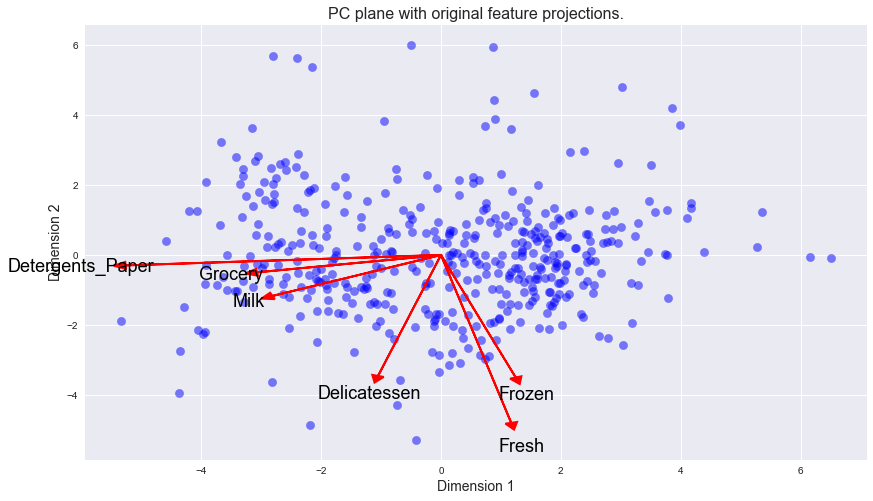

In [33]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

Detergent_Paper, Grocery, and Milk seem to be the most strongly corelated with the first componenet. Fresh, Frozen, and Delicatessen seem to be the most associated with the second component. This seems in line with the first plot we made with 6 dimensions where those same labels correlated with the first two dimensions.

## Clustering

In this section, we will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

First let's discuss the advantages and disadvantages of KMeans and GMM's.

K-Means Advantages :

* If there is a large amount of features, then  K-Means is often computationally faster than hierarchical clustering, if we keep k smalls.
* K-Means produce tighter clusters than hierarchical clustering.

K-Means Disadvantages :

* Difficult to predict K-Value, and often needs guess and check.
* Different initial partitions can result in different final clusters.
* Doesn't work well with clusters of different sizes and different densities.

Gaussian Mixture Model Advantages:

* A lot more flexible in terms of cluster covariance.
* k-means is actually a special case of GMM in which each cluster’s covariance along all dimensions approaches 0. This implies that a point will get assigned only to the cluster closest to it. 
* With GMM, each cluster can have unconstrained covariance structure. 
* GMM structure makes it more flexible than in k-means. 

Gaussian Mixture Model Disadvantages:

* GMM's can Cconverge to local optimal which will give inaccurate results
* Computationally more expensive if the number of features or distributions is large
* Needs a large data sets
* Hard to estimate the number of clusters

The difference between KMeans and GMM are about hard or soft assignment:

* Let's says we are aiming to break the data into three clusters. K means will start with the assumption that a given data point belongs to one cluster. At a given point in the algorithm, we are certain that a point belongs to certain cluster. In the next iteration, we might revise that belief, and be certain that it belongs to a different cluster.
* However, remember, in each iteration, we are absolutely certain as to which cluster the point belongs to. This is the "hard assignment" of KMeans clustering.
* What if we are uncertain? What if we think, well, I can't be sure, but there is 70% chance it belongs to cluster 1, but also 10% chance its in cluster 2, and 20% chance it might be in cluster 3. That's a soft assignment. The Mixture of Gaussian model helps us to express this uncertainty. It starts with some prior belief about how certain we are about each point's cluster assignments. As it goes on, it revises those beliefs. But it incorporates the degree of uncertainty we have about our assignment.

After discussing the various trade offs of KMeans and GMM's, a good strategy is to go with the faster KMeans for preliminary analysis, and if we later think that the results could be significantly improved, use GMM while using the cluster assignments and centres obtained from KMeans as the initialisation for GMM. In fact, many implementations of GMM automatically perform this preliminary step for initialisation. So to start, we'll use KMeans.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that we expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, we will need implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [34]:
scores = {}

for n in range(2,10):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    # Add to scores list
    scores[n] = score

### Observation

In [35]:
print(scores)

{2: 0.4262810154691084, 3: 0.39689092644980506, 4: 0.33119558416124711, 5: 0.34960746061596643, 6: 0.35616404243305366, 7: 0.36451853700546444, 8: 0.36804513368161196, 9: 0.34635125076092826}


From looking at the scores it appears that 2 clusters give the highest silouette score of 0.42628

Let's re-fit Kmeans with 2 clusters:

In [36]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

### Cluster Visualization
Once we've chosen the optimal number of clusters for our clustering algorithm using the scoring metric above, we can now visualize the results by executing the code block below.

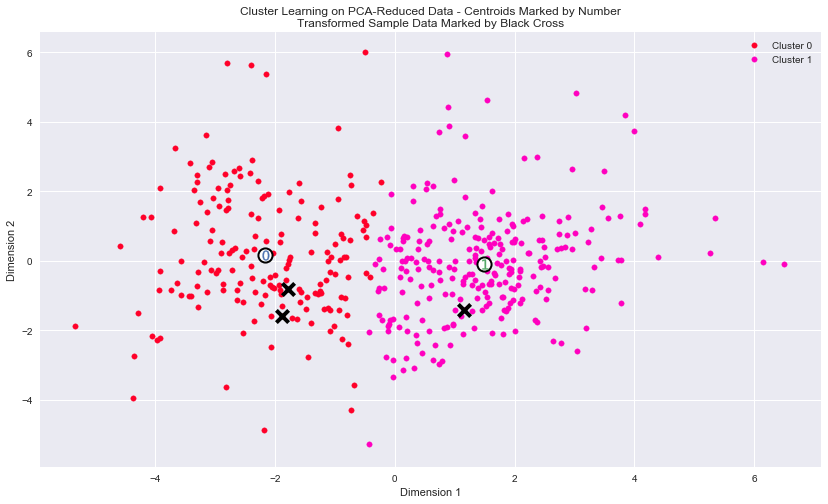

In [37]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, we will implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [38]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


### Observation
Let's consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project.

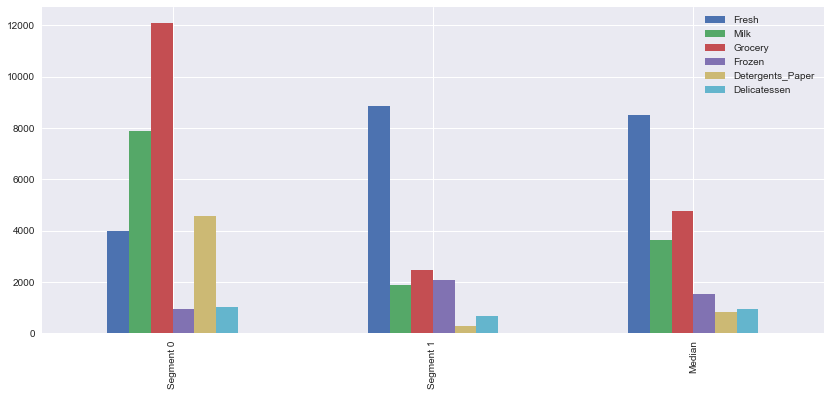

In [39]:
# Use Seaborn for Data Visualisation of samples
segment_bar = true_centers.append(data_description.loc['50%'])
segment_bar.index = ["Segment 0", "Segment 1", "Median"]
plot = segment_bar.plot(kind='bar', figsize=(14,6))

Segment 0: Purchases above median Milk, Grocery, and Detergents Paper, purchases around median Delicatessen, and purchases below median Fresh and Frozen. The high purchase of Milk, Grocery, and Detergents paper could mean this is a Retailer.

Segment 1: Purchases above median Frozen, purchases around median Fresh and Delicatessen, and purchases below median Milk, Grocery, and Detergents_Paper. The high purchases of Frozen and around average purchase of Fresh and Delicatessen could mean this is a restaurant.

Let's run the code block below to find which cluster each sample point is predicted to be:

In [40]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


## Conclusion

In this final section, we will investigate ways that we can make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, we will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. 

However, the distributor will only make this change in delivery service for customers that react positively. 

Now that we have two customer segements, Segment 0 and Segment 1, we can think about how each segment will be effected by changing the delivery schedule.

With our new segments, we can an A/B test on a small subset for each cluster. For example, we could take 20% of Cluster 0 customers and try the new delivery schedule. If there is no reaction or a positive reaction then we'll move the other 80% of customers in that cluster to the same delivery schedule. We can then repeate this sampe test with 20% of Cluster 1 customers. If they have no reaction or react positively we can swith the other 80% of Cluster 1 to the new delivery schedule. 

If one Cluster reacts positively and the other Cluster negatively we can switch only one of the clusters to a new delivery schedule.

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.   

A supervised learner could be used to train on the original customers.

The A/B testing would give us a perfect training set for supervised learning where the cluster label is a very relevant input feature. One can take preference for a particular delivery time as the target variable we want to predict. With our new segements (see above), we could apply labels to them saying if the change in delivery effects them (1) or doesn't effect them (0). We could then run a supervised learning algorithm and start classifying which segments are effected. Then when a new customer gets acquired we can do our unsupervised learning, segment them, and then determine whether they should be 5 day a week delivery or 3 day a week. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Let's run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, we will find the sample points are circled in the plot, which will identify their labeling.

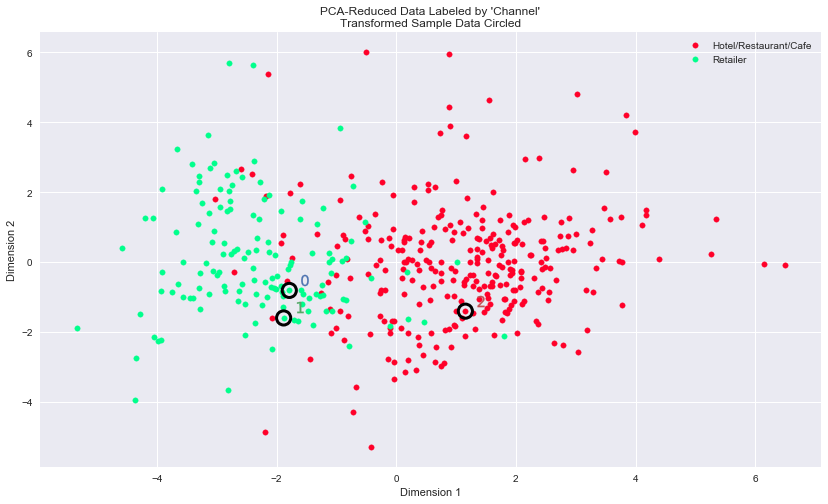

In [41]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Observation

Interesting! The two clusters we arrived at through Kmeans, match the above graph almost exactly! 

From our clusters we can definitely classify some of our customers as Retailers or Hotels/Restaurants/Cafes. Also what's great about this, is the Kmeans classifications of 2 clusters are much more well defined then our initial predictions earlier in the notebook, where we were guessing at restuarants, cafes, and delicatessen's.

Also it's interesting to note even when the data is not linearly separable, as is generally the case in real world, KMeans can still give surprisingly good results, and is therefore, a good first algorithm to use for a lot of clustering problems.

GMM could also have been a good choice here as the scalability is not an issue and the clusters do have a fair amount of overlap in reality. Although a perfect classification is not possible to achieve even with GMM, soft clustering gives us confidence levels in our predictions, which would understandably be low at the boundary between two clusters.

In summary though, this customer segment problem is just another example of the power of unsupervised learning!

> **Note**: You can export the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**.